In [1]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd
import sys
import networkx as nx
import os
import warnings
# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

sys.path.append(
    '/Users/bede01/Documents/work/phd-papers/ml-workload-optimization/code/jupyter/operations/'
)

# Experiment Graph
from execution_environment import ExecutionEnvironment as ee

# Suppress warnings
warnings.filterwarnings('ignore')
% matplotlib inline

def plot_graph():
    plt.figure(figsize=(12, 12))
    pos = nx.spring_layout(ee.graph.graph)
    #pos = graphviz_layout(ee.graph.graph, prog='twopi', args='')
    color_map = []
    for node in ee.graph.graph.nodes(data=True):

        if node[1]['root']:
            color_map.append('green')
        elif node[1]['type'] == 'Dataset' or node[1]['type'] == 'Feature':
            color_map.append('red')
        elif node[1]['type'] == 'Agg' or node[1]['type'] == 'SK_Model':
            color_map.append('blue')
        elif node[1]['type'] == 'SuperNode':
            color_map.append('grey')
        else:
            color_map.append('black')

    nx.draw(ee.graph.graph,
            node_color=color_map,
            pos=pos,
            node_size=100)
    nx.draw_networkx_edge_labels(ee.graph.graph,
                                 pos=pos,
                                 edge_labels={(u, v): d["name"] for u, v, d in ee.graph.graph.edges(data=True)})
    plt.show()

def get_size(graph):
    def get_mb(df):
        to_mb = (1024*1024)
        if isinstance(df, pd.DataFrame):
            return sum(df.memory_usage(index=True, deep=True))/to_mb
        elif isinstance(df, pd.Series):
            return df.memory_usage(index=True, deep=True)/to_mb
        else:
            return sys.getsizeof(df)/to_mb
    
    t_size = 0
    for node in graph.nodes(data=True):
        t_size += get_mb(node[1]['data'].data)
    return t_size

        


In [2]:
ROOT_DIRECTORY = '../../data/home-credit-default-risk'
print(os.listdir(ROOT_DIRECTORY))

['application_test.csv', 'HomeCredit_columns_description.csv', 'POS_CASH_balance.csv', 'credit_card_balance.csv', 'installments_payments.csv', 'application_train.csv', 'bureau.csv', 'previous_application.csv', 'bureau_balance.csv', 'sample_submission.csv']


In [3]:
app_train = ee.load(ROOT_DIRECTORY + '/application_train.csv')
print('Training data shape: ', app_train.shape().get())
app_train.head().get()

('Training data shape: ', (307511, 122))


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
app_test = ee.load(ROOT_DIRECTORY + '/application_test.csv')
print('Testing data shape: ', app_test.shape().get())
app_test.head().get()

('Testing data shape: ', (48744, 121))


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
app_train['TARGET'].value_counts().get()

0    282686
1     24825
Name: TARGET, dtype: int64

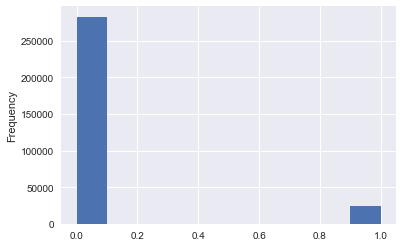

In [6]:
app_train['TARGET'].get().astype(int).plot.hist()

In [7]:
# Function to calculate missing values by column# Funct
def missing_values_table(dataset):
    # Total missing values
    mis_val = dataset.isnull().sum().get()
    
    mis_val_percent = 100 * mis_val / len(dataset.get())
    
    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
     # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(columns={
        0: 'Missing Values',
        1: '% of Total Values'
    })
    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
            '% of Total Values', ascending=False).round(1)

    # Print some summary information
    print("Your selected dataframe has " + str(dataset.shape().data[1]) + " columns.\n"
          "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns

In [8]:
missing_values = missing_values_table(app_train)
missing_values.head(20)

Your selected dataframe has 122 columns.
There are 67 columns that have missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


In [9]:
app_train.meta['dtypes'].value_counts()

float64    65
int64      41
object     16
dtype: int64

In [10]:
app_train.select_dtypes('object').nunique().get()

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

In [11]:
# Create a label encoder object
le = LabelEncoder()
le_count = 0

for col in app_train.select_dtypes('object').get().columns:
    # we are not using nunique because it discard nan
    if app_train[col].nunique(dropna=False).get() <= 2:
        model = app_train[col].fit_sk_model(le)

        transformed_train = model.transform_col(app_train[col], col)
        app_train = app_train.drop(col)
        app_train = app_train.add_column(transformed_train, col)

        transformed_test = model.transform_col(app_test[col], col)
        app_test = app_test.drop(col)
        app_test = app_test.add_column(transformed_train, col)
            

        # Keep track of how many columns were label encoded
        le_count += 1
print('%d columns were label encoded.' % le_count)

3 columns were label encoded.


In [12]:
app_train = app_train.onehot_encode()
app_test = app_test.onehot_encode()

print('Training Features shape: ', app_train.shape().get())
print('Testing Features shape: ', app_test.shape().get())

('Training Features shape: ', (307511, 243))
('Testing Features shape: ', (48744, 239))


In [13]:
train_labels = app_train['TARGET']
for c in app_train.get().columns:
    if c not in app_test.get().columns:
        app_train = app_train.drop(c)

app_train = app_train.add_column(train_labels, 'TARGET')

print('Training Features shape: ', app_train.shape().get())
print('Testing Features shape: ', app_test.shape().get())

('Training Features shape: ', (307511, 240))
('Testing Features shape: ', (48744, 239))


In [14]:
(app_train['DAYS_BIRTH'] * 1.0/365).describe().get()

count    307511.000000
mean        -43.936973
std          11.956133
min         -69.120548
25%         -53.923288
50%         -43.150685
75%         -34.008219
max         -20.517808
Name: DAYS_BIRTH, dtype: float64

In [15]:
app_train['DAYS_EMPLOYED'].describe().get()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

Text(0.5,0,u'Days Employment')

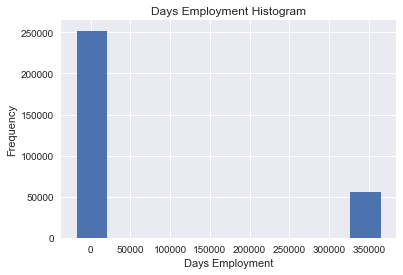

In [16]:
app_train['DAYS_EMPLOYED'].get().plot.hist(title = 'Days Employment Histogram')
plt.xlabel('Days Employment')

In [17]:
anom = app_train[app_train['DAYS_EMPLOYED'] == 365243]
non_anom = app_train[app_train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 *  non_anom['TARGET'].mean().get()))
print('The anomalies default on %0.2f%% of loans' % (100 *  anom['TARGET'].mean().get()))
print('There are %d anomalous days of employment' % anom.shape().get()[0])

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


Text(0.5,0,u'Days Employment')

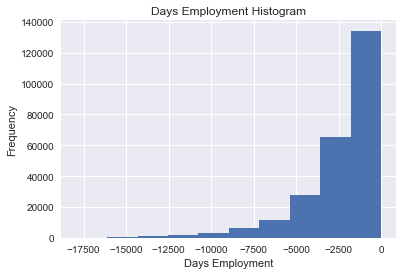

In [18]:
days_employed_anom = app_train["DAYS_EMPLOYED"] == 365243
app_train = app_train.add_column(days_employed_anom, 'DAYS_EMPLOYED_ANOM')
temp = app_train['DAYS_EMPLOYED'].replace({365243: np.nan})
app_train = app_train.drop('DAYS_EMPLOYED')
app_train = app_train.add_column(temp,'DAYS_EMPLOYED')

app_train["DAYS_EMPLOYED"].get().plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment')     

In [19]:
days_employed_anom = app_test["DAYS_EMPLOYED"] == 365243
app_test = app_test.add_column(days_employed_anom, 'DAYS_EMPLOYED_ANOM')
temp = app_test['DAYS_EMPLOYED'].replace({365243: np.nan})
app_test = app_test.drop('DAYS_EMPLOYED')
app_test = app_test.add_column(temp,'DAYS_EMPLOYED')
print('There are %d anomalies in the test data out of %d entries' 
      % (app_test['DAYS_EMPLOYED_ANOM'].sum().get(), 
         app_test.shape().get()[0]))

There are 9274 anomalies in the test data out of 48744 entries


In [20]:
#correlations = app_train.corr().get()
#top = correlations['TARGET'].sort_values()
#correlations = po.f_sort_values(po.project(po.d_corr(app_train), 'TARGET'))
# Display correlations
#print('Most Positive Correlations:\n', top.tail(15))
#print('\nMost Negative Correlations:\n', top.head(15))

In [21]:
abs_age = app_train['DAYS_BIRTH'].abs()
app_train = app_train.drop('DAYS_BIRTH')
app_train = app_train.add_column(abs_age, 'DAYS_BIRTH')
app_train['DAYS_BIRTH'].corr(app_train['TARGET']).get()

-0.078239308309827088

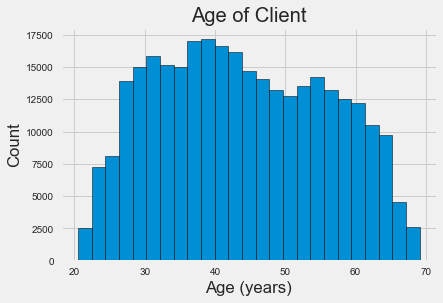

In [22]:
# Set the style of plots
plt.style.use('fivethirtyeight')

# Plot the distribution of ages in years
plt.hist((app_train['DAYS_BIRTH']/365).get(), edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

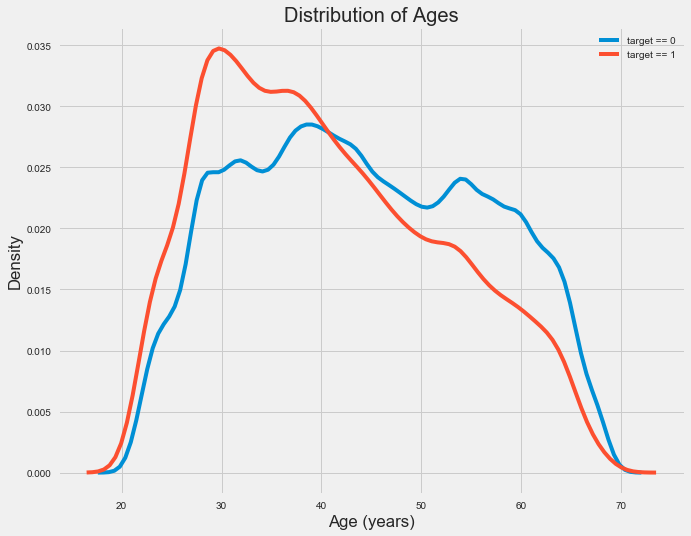

In [23]:
plt.figure(figsize = (10, 8))
# KDE plot of loans that were repaid on time
sns.kdeplot((app_train[app_train['TARGET'] == 0]['DAYS_BIRTH']/365).get(), label = 'target == 0')
# KDE plot of loans which were not repaid on time
sns.kdeplot((app_train[app_train['TARGET'] == 1]['DAYS_BIRTH']/365).get(), label = 'target == 1')
# Labeling of plot
plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [24]:
# Age information into a separate dataframe
age_data = app_train[['TARGET', 'DAYS_BIRTH']]
years_birth = age_data['DAYS_BIRTH'] / 365
age_data = age_data.add_column(years_birth, 'YEARS_BIRTH')

In [25]:
binned = age_data['YEARS_BIRTH'].binning(20, 70, 11)
binned.setname('YEARS_BINNED')
age_data = age_data.add_column(binned, 'YEARS_BINNED')
age_data.head(5).get()

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"


In [26]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups.get()

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


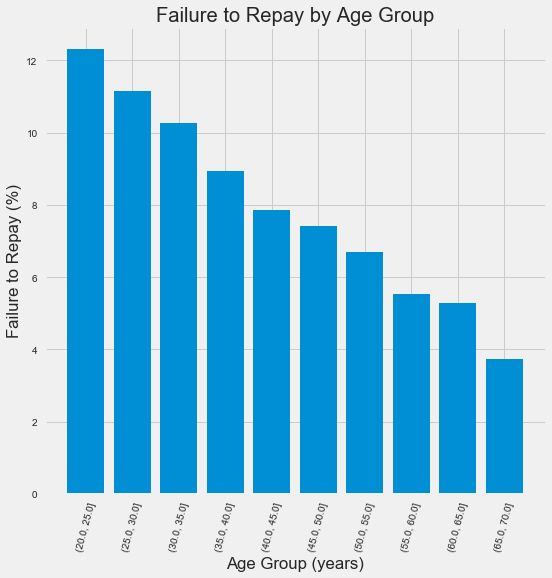

In [27]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.get().index.astype(str), age_groups.get()['TARGET'] * 100)

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)')
plt.title('Failure to Repay by Age Group');

In [28]:
ext_data = app_train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr().get()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


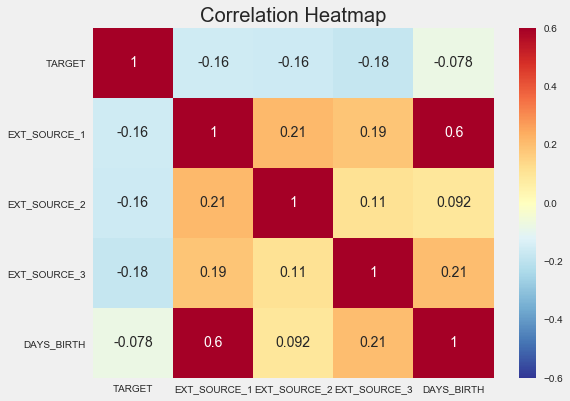

In [29]:
plt.figure(figsize = (8, 6))

# Heatmap of correlations
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

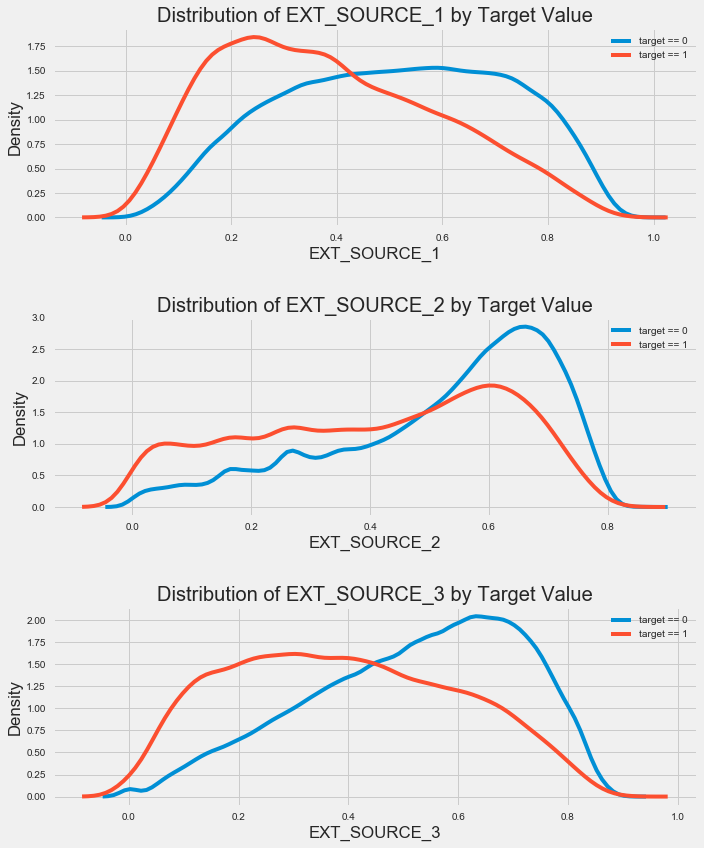

In [30]:
plt.figure(figsize = (10, 12))

# iterate through the sources
for i, column in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # create a new subplot for each source
    plt.subplot(3, 1, i + 1)
    # plot repaid loans
    source_data = app_train[[column, 'TARGET']][app_train['TARGET'] == 0]
    sns.kdeplot(source_data[app_train[column].notna()][column].get(), label = 'target == 0')
    # plot loans that were not repaid
    source_data = app_train[[column, 'TARGET']][app_train['TARGET'] == 1]
    sns.kdeplot(source_data[app_train[column].notna()][column].get(), label = 'target == 1')
    
    # Label the plots
    plt.title('Distribution of %s by Target Value' % column)
    plt.xlabel('%s' % column); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

In [31]:
# # Copy the data for plotting
# plot_data = ext_data.drop('DAYS_BIRTH')

# # Add in the age of the client in years
# plot_data = plot_data.add_column( age_data['YEARS_BIRTH'], col_name='YEARS_BIRTH')
# # Drop na values and limit to first 100000 rows
# plot_data = plot_data.head(100000).dropna()

# # Create the pairgrid object
# grid = sns.PairGrid(data = plot_data.get(), size = 3, diag_sharey=False,
#                     hue = 'TARGET', 
#                     vars = [x for x in list(plot_data.get().columns) if x != 'TARGET'])

# # Upper is a scatter plot
# grid.map_upper(plt.scatter, alpha = 0.2)

# # Diagonal is a histogram
# grid.map_diag(sns.kdeplot)

# # Bottom is density plot
# grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r)

# plt.suptitle('Ext Source and Age Features Pairs Plot', size = 32, y = 1.05);

In [32]:
# Make a new dataframe for polynomial features
poly_features = app_train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = app_test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
imputer_model = poly_features.fit_sk_model(imputer)
poly_features = imputer_model.transform(poly_features)
poly_features_test = imputer_model.transform(poly_features_test)

In [35]:
from sklearn.preprocessing import PolynomialFeatures
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer_model = poly_features.fit_sk_model(poly_transformer)

poly_features = poly_transformer_model.transform(poly_features)
poly_features_test = poly_transformer_model.transform(poly_features_test)


In [ ]:
poly_features.head().get()